# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Abror Muhammad Hazim]
- **Email:** [abrormhazim@gmail.com]
- **ID Dicoding:** [abrormh]

## Menentukan Pertanyaan Bisnis

- Bagaimana cara meningkatkan jumlah casual user yang menyewa sepeda pada hari kerja?
- Bagaimana perbadingan antara casual dan registered user pada tahun 2011?
- Apa pengaruh Cuaca terhadap Jumlah Sewa Sepeda pada tahun 2012?

## Import Semua Packages/Library yang Digunakan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Wrangling

### Gathering Data

In [6]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [8]:
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


terdapat kesalahan tipe data pada kolom "dteday" seharusnya berupa datetime

In [9]:
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


sama seperti dataset day, terdapat kesalahan tipe data pada kolom "dteday" seharusnya berupa datetime

cek missing value

In [10]:
print(day_df.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [11]:
print(hour_df.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


berdasarkan hasil yang diperoleh, kedua dataset tidak memiliki null value atau nilai yang kosong

cek data duplikat

In [12]:
print('data day:', day_df.duplicated().sum())
print("data hour:", day_df.duplicated().sum())

data day: 0
data hour: 0


dari hasil yang didapatkan kedua dataset tersebut tidak memiliki data yang duplikat atau sama

deskripsi data

In [13]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [14]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

mengubah tipe data pada kolom "dteday" dari object mejadi datetime

In [15]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [16]:
# cek tipe data apakah sudah berubah atau belum
print('day_df "dteday" : ', day_df["dteday"].dtypes)
print('hour_df "dteday" : ', hour_df["dteday"].dtypes)

day_df "dteday" :  datetime64[ns]
hour_df "dteday" :  datetime64[ns]


## Exploratory Data Analysis (EDA)

heatmap korelasi variabel numerik

In [17]:
correlation_matrix = day_df.corr()
fig = px.imshow(correlation_matrix, title="Korelasi antara Variabel Numerik")
fig.show()

<ipython-input-17-29ae8687ced4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = day_df.corr()


histogram distribusi variabel numerik

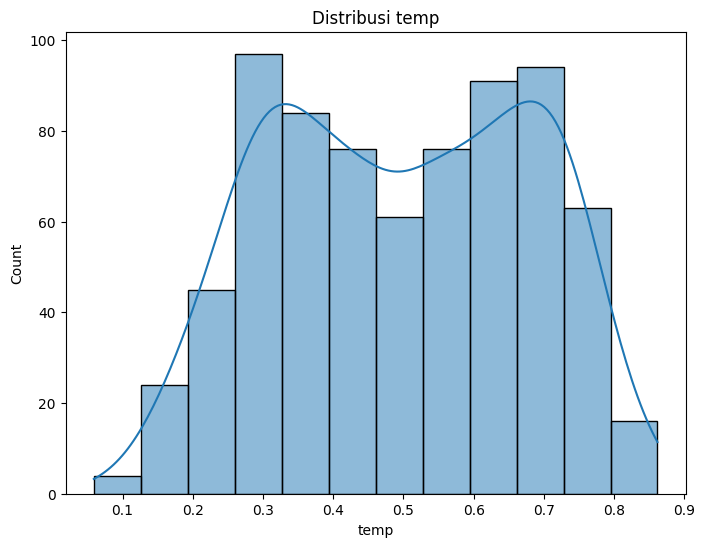

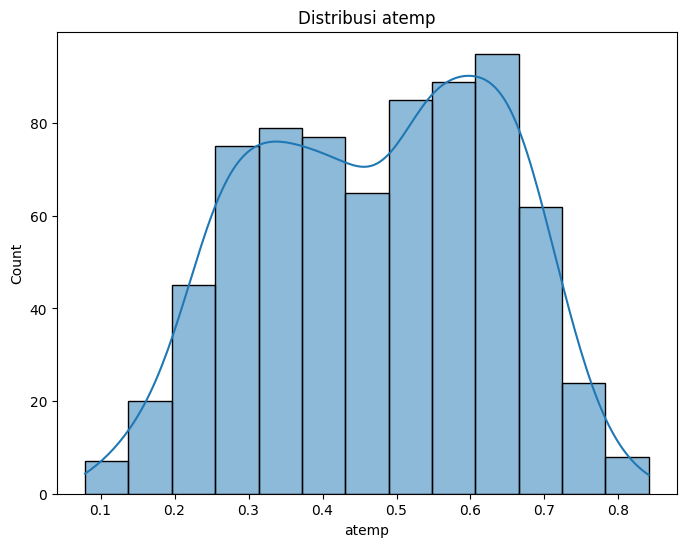

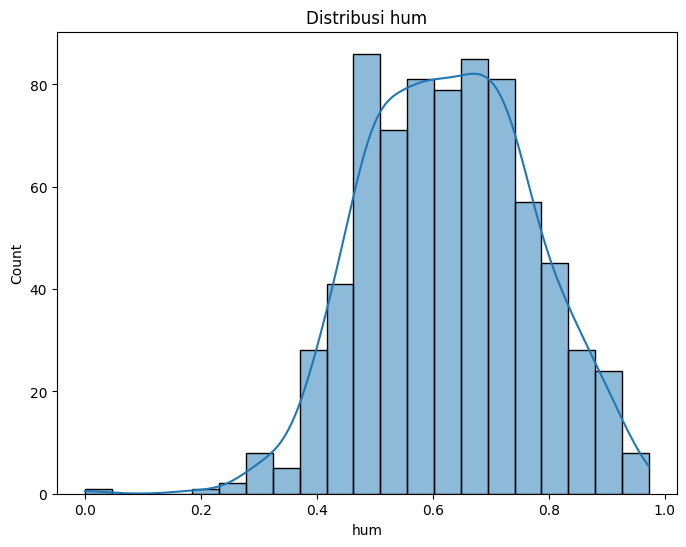

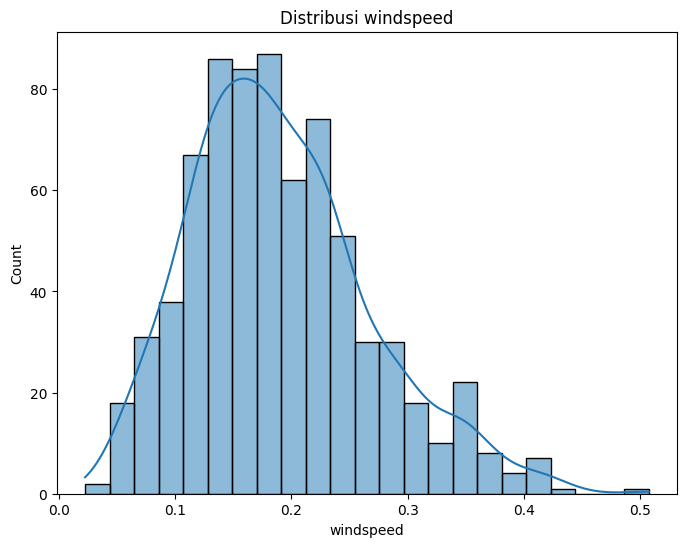

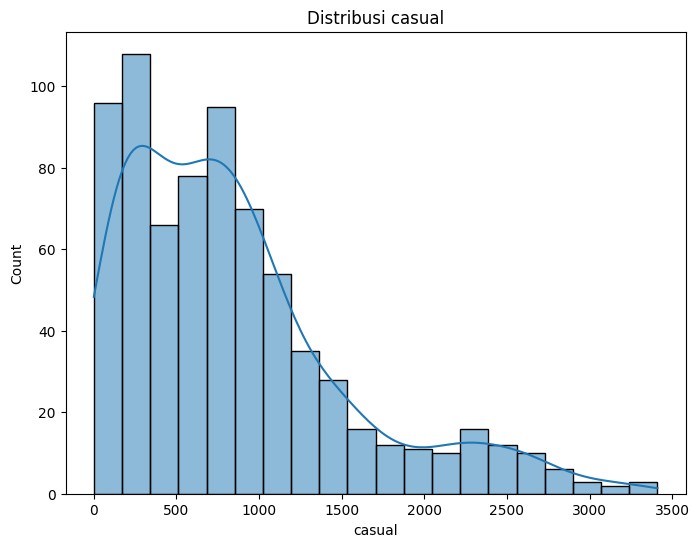

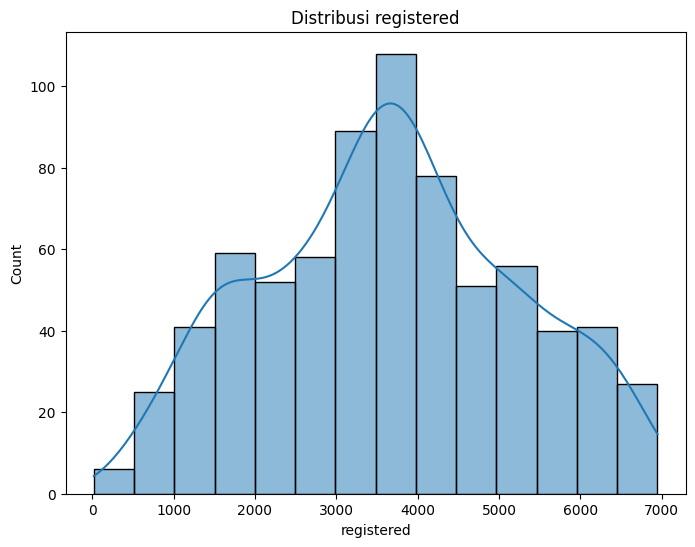

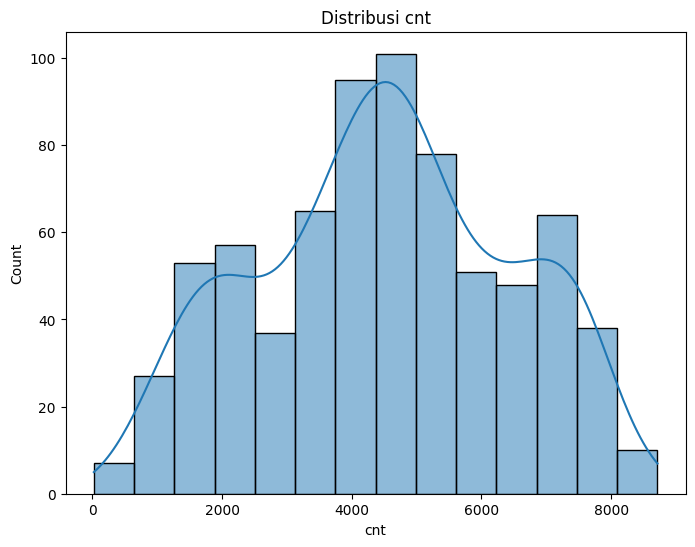

In [18]:
kol_numerik = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

for col in kol_numerik:
    plt.figure(figsize=(8, 6))
    sns.histplot(day_df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

Hubungan Musim dengan jumlah sewa berdasarkan working day

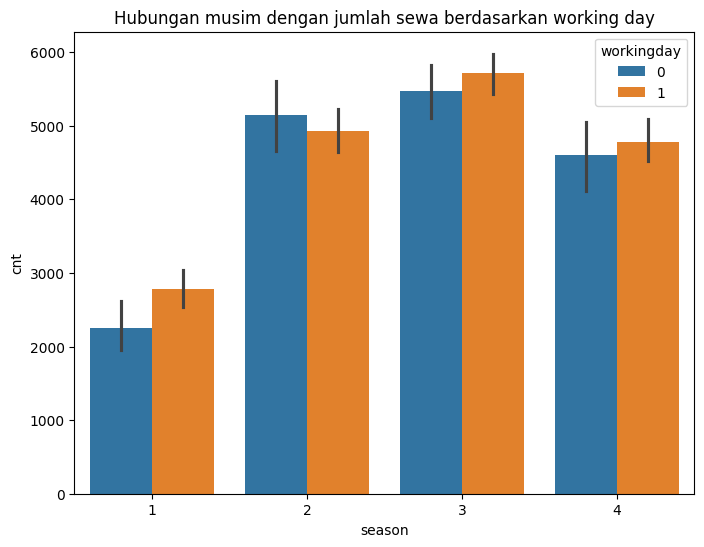

In [19]:
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='cnt', data=day_df, hue='workingday')
plt.title('Hubungan musim dengan jumlah sewa berdasarkan working day')
plt.show()

Hubungan hari libur dengan jumlah sewa

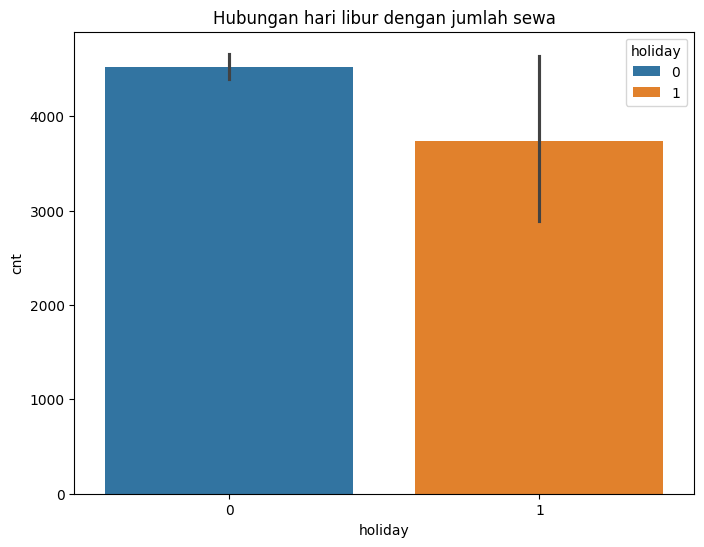

In [20]:
plt.figure(figsize=(8, 6))
sns.barplot(x='holiday', y='cnt', data=day_df, hue="holiday")
plt.title('Hubungan hari libur dengan jumlah sewa')
plt.show()

Hubungan Musim dengan jumlah sewa

In [21]:
fig = px.box(day_df, x='season', y='cnt', color='season', title='Hubungan Musim dengan jumlah sewa')
fig.show()

Hubungan cuaca dengan jumlah sewa

In [22]:
fig = px.box(day_df, x='weathersit', y='cnt', color='weathersit', title='Hubungan cuaca dengan jumlah sewa')
fig.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana cara meningkatkan jumlah casual user yang menyewa sepeda pada hari kerja?





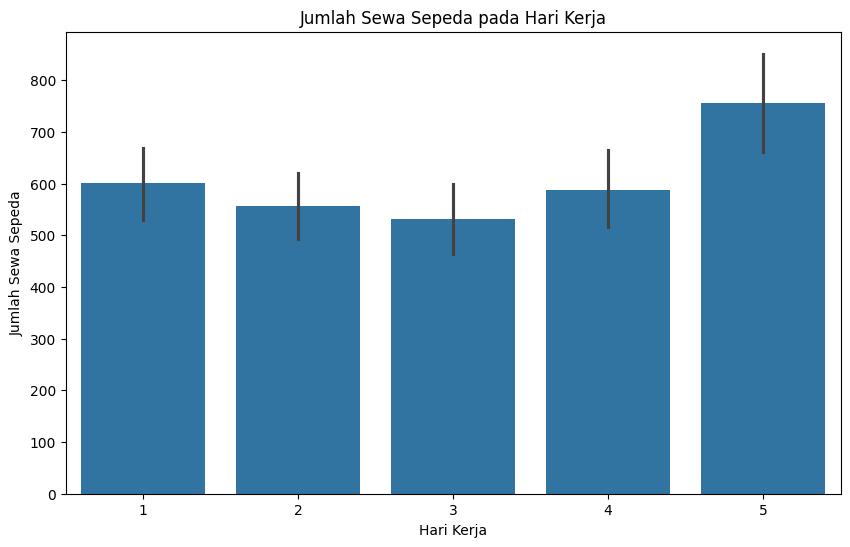

In [63]:
filtered_data_wDay = day_df[day_df["workingday"] == 1]

plt.figure(figsize=(10, 6))
sns.barplot(x="weekday", y="casual", data=filtered_data_wDay)
plt.title("Jumlah Sewa Sepeda pada Hari Kerja")
plt.xlabel("Hari Kerja")
plt.ylabel("Jumlah Sewa Sepeda")
plt.show()

Hasil analisis:
*   Jumlah sewa sepeda paling tinggi pada hari Jumat
*   Jumlah sewa sepeda paling rendah pada hari Rabu
*   Casual user lebih cenderung menggunakan sepeda di akhir minggu  
*   jumlah sewa sepeda di tengah minggu lebih rendah signifikan dibanding akhir minggu






### Pertanyaan 2: Bagaimana perbadingan antara casual dan registered user pada tahun 2011?





In [47]:
filtered_data_2011 = day_df[(day_df["yr"] == 0)]

fig = px.line(filtered_data_2011, x="dteday", y=["registered", "casual"],
              title="Timeline Registered dan Casual User selama Tahun 2011")
fig.update_xaxes(title="Bulan")
fig.update_yaxes(title="Jumlah User")

fig.show()

pada visualisasi di atas terlihat bahwa:
*   Jumlah registered dan casual user menunjukkan tren yang sama selama tahun 2011
*   Jumlah registered user lebih tinggi daripada jumlah casual user
*   Pada bulan Mei jumlah registered user mengalami peningkatan secara signifikan dibanding bulan sebelumnya
*   Pada bulan Agustus, lebih tepatnya tanggal 27 Agustus 2011 registered user mengalami penurunan yang sangat signifikan






### Pertanyaan 3: Apa pengaruh Cuaca terhadap Jumlah Sewa Sepeda pada tahun 2012?

In [52]:
filtered_data_2012 = day_df[day_df["yr"] == 1]

fig = px.bar(filtered_data_2012, x="weathersit", y="cnt", title="Pengaruh Cuaca terhadap Jumlah Sewa Sepeda pada tahun 2012")
fig.update_xaxes(title="Cuaca (weathersit)")
fig.update_yaxes(title="Jumlah Sewa Sepeda (cnt)")

fig.show()

Dari visualisasi di atas, dapat disimpulkan bahwa kondisi cuaca berpengaruh signifikan terhadap jumlah sepeda yang dipinjam. Peningkatan cuaca cerah atau sebagian berawan (weathersit 1) terkait dengan lonjakan peminjaman sepeda. Hasil analisis ini penting untuk penyedia layanan sewa sepeda, membantu mereka mengelola stok, menetapkan tarif, dan merancang strategi pemasaran sesuai dengan perubahan cuaca.

note:
*   1: Clear, Few clouds, Partly cloudy, Partly cloudy
*   2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
*   3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
*   4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


## Conclusion

**Conclution pertanyaan 1**

Jumlah sewa sepeda mencapai puncaknya pada Jumat, menunjukkan minat pelanggan menggunakan sepeda menjelang akhir pekan, sedangkan Rabu mencatat jumlah sewa terendah. Casual user aktif di akhir minggu, namun terjadi penurunan signifikan pada tengah minggu, kemungkinan dipengaruhi oleh rutinitas kerja.

saran:
- Mempertimbangkan strategi promosi atau penawaran khusus untuk meningkatkan penggunaan sepeda di tengah minggu.
- Mempromosikan kegiatan atau penawaran spesial pada hari Jumat supaya pengguna lebih loyal.
- Melakukan analisis lebih lanjut untuk memahami faktor-faktor yang mungkin memengaruhi tren penggunaan sepeda pada hari-hari tertentu, seperti cuaca atau faktor lainnya.

**Conclution pertanyaan 2**

Pada tahun 2011, terdapat tren yang mirirp antara registered dan casual user, dengan jumlah registered user secara konsisten lebih tinggi. Pada bulan Mei, terjadi peningkatan signifikan untuk registered user. Namun, pada tanggal 27 Agustus 2011, terjadi penurunan tajam pada jumlah registered user.

saran:
- Mengembangkan strategi pemasaran yang lebih menarik untuk casual user, mungkin dengan menawarkan program atau promosi khusus.
- Menyelidiki faktor-faktor yang dapat menjelaskan peningkatan yang signifikan pada bulan Mei untuk registered user, seperti event khusus atau perubahan musim.
- Menyelidiki penyebab penurunan yang sangat signifikan pada 27 Agustus 2011 untuk registered user guna mengidentifikasi permasalahan dan mencegahnya terjadi kembali di masa mendatang.

**Conclution pertanyaan 3**

Kondisi cuaca berpengaruh signifikan terhadap jumlah sepeda yang dipinjam. Peningkatan cuaca cerah atau sebagian berawan terkait dengan lonjakan peminjaman sepeda. Hasil analisis ini penting untuk penyedia layanan sewa sepeda, membantu mereka mengelola stok, menetapkan tarif, dan merancang strategi pemasaran sesuai dengan perubahan cuaca.

saran:
- Menyesuaikan stok sepeda berdasarkan hasil analisis cuaca, khususnya meningkatkan persediaan saat cuaca cerah atau sebagian berawan yang terkait dengan lonjakan peminjaman sepeda.
- Mengembangkan strategi pemasaran yang lebih tertarget berdasarkan analisis cuaca. Memanfaatkan kondisi cuaca yang menguntungkan, seperti membuat iklan atau promosi khusus.
- Menerapkan sistem tarif yang dinamis yang merespons perubahan kondisi cuaca.